## Ground Truth Test

In [2]:
import torch
import torchvision.transforms as transforms               
from torchvision.datasets import CIFAR10       
from torch.utils.data import DataLoader
import detectors
import timm
from src.temperature_scaling import ModelWithTemperature
from src.cifar10h import aps_cifar10h_hist, raps_cifar10h_hist, saps_cifar10h_hist, aps_cifar10h_scatter, raps_cifar10h_scatter, saps_cifar10h_scatter


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load fine-tuned model
model = timm.create_model("resnet50_cifar10", pretrained=True)
model.to(device)

# reprocess the images from CIFAR10
data_transform = transforms.Compose([
    transforms.ToTensor(),          # transfer to tensor
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # normalize
])
# load images from CIFAR10
dataset = CIFAR10(root="../data", train=False, download=True, transform=data_transform)

# Temperature Scaling
temp_scal_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = ModelWithTemperature(model, temperature=5.0).to(device)
model.set_temperature(temp_scal_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.05

Files already downloaded and verified
Before temperature - NLL: 0.347, ECE: 0.046
Optimal temperature: 4.908
After temperature - NLL: 0.828, ECE: 0.421


APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9244 ± 0.0036
Final Average Prediction Set Size: 1.08 ± 0.01
Final Average Coverage: 0.9451 ± 0.0052
Final Average Real Probability: 0.9218 ± 0.0054


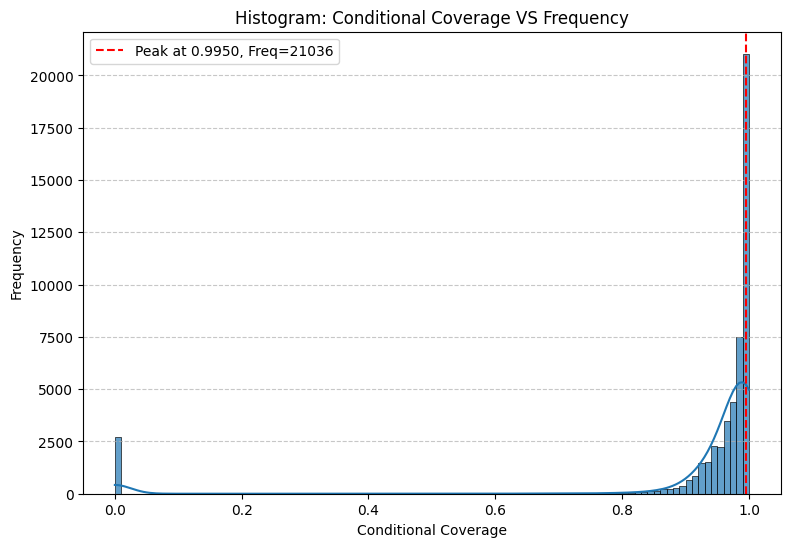

21036 (42.07%) samples reached the peak conditional coverage at 0.9950


In [3]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9263 ± 0.0035
Final Average Prediction Set Size: 0.99 ± 0.01
Final Average Coverage: 0.9448 ± 0.0051
Final Average Real Probability: 0.9122 ± 0.0050


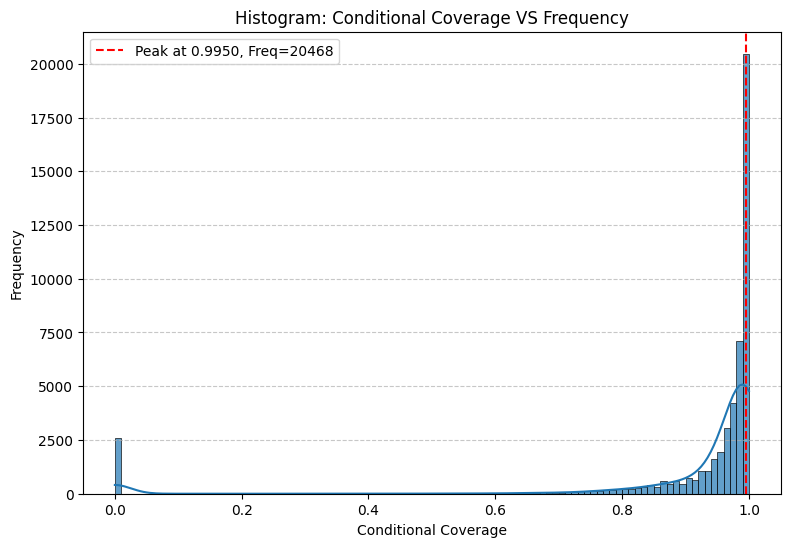

20468 (40.94%) samples reached the peak conditional coverage at 0.9950


In [4]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.1, k_reg=1, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9335 ± 0.0026
Final Average Prediction Set Size: 0.97 ± 0.00
Final Average Coverage: 0.9501 ± 0.0026
Final Average Real Probability: 0.9141 ± 0.0024


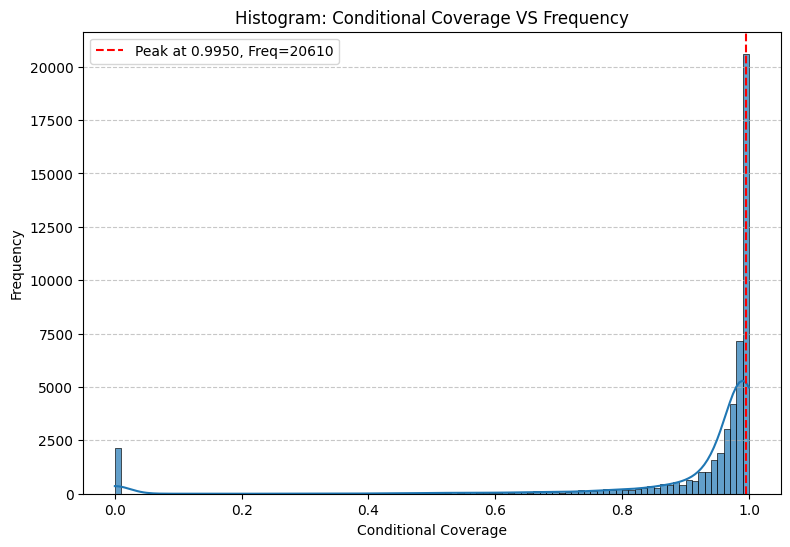

20610 (41.22%) samples reached the peak conditional coverage at 0.9950


In [5]:
saps_cifar10h_hist(model, dataset, device, lambda_=2.0, num_runs=10, alpha=0.05)

## Model Test

APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5839 ± 0.0051
Final Average Prediction Set Size: 1.81 ± 0.03
Final Average Coverage: 0.9478 ± 0.0041
Final Average Real Probability: 0.9228 ± 0.0041


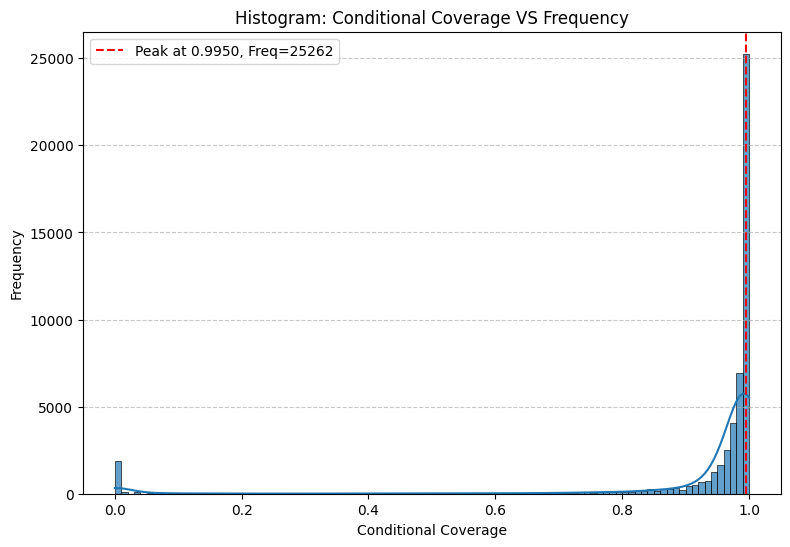

25262 (50.52%) samples reached the peak conditional coverage at 0.9950


In [3]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5839 ± 0.0051
Final Average Prediction Set Size: 1.81 ± 0.03
Final Average Coverage: 0.9478 ± 0.0041
Final Average Real Probability: 0.9228 ± 0.0041


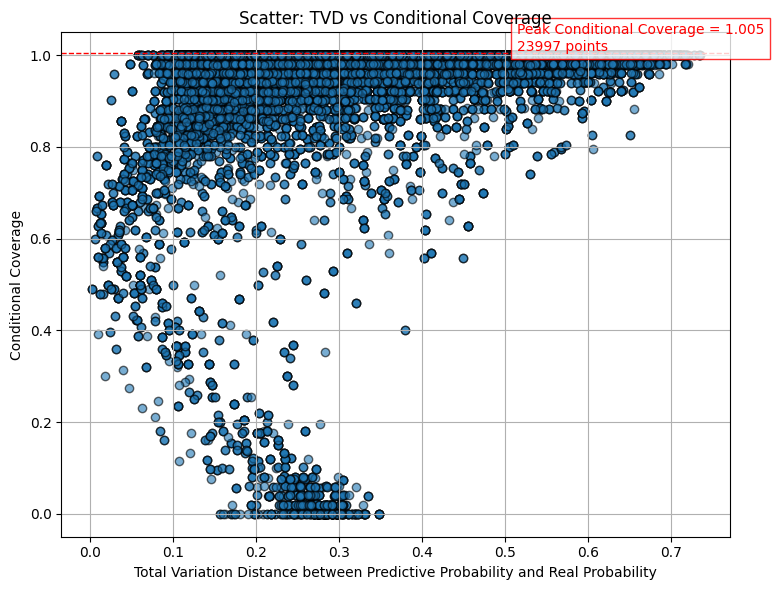

Peak Conditional Coverage = 1.005, with 23997 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.79461']
  Real Probability Set      : ['0.96078']
Sample 2:
  Predictive Probability Set: ['0.77699']
  Real Probability Set      : ['0.96226']
Sample 3:
  Predictive Probability Set: ['0.82545']
  Real Probability Set      : ['1.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.36250', '0.15952']
  Real Probability Set      : ['0.01961', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.30666', '0.12925', '0.11247', '0.09796']
  Real Probability Set      : ['0.00000', '0.00000', '0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.21156', '0.17110', '0.13322']
  Real Probability Set      : ['0.00000', '0.00000', '0.03846']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.16867', '0.15487', '0.14035', '0

In [7]:
aps_cifar10h_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5983 ± 0.0053
Final Average Prediction Set Size: 1.63 ± 0.03
Final Average Coverage: 0.9490 ± 0.0039
Final Average Real Probability: 0.9233 ± 0.0038


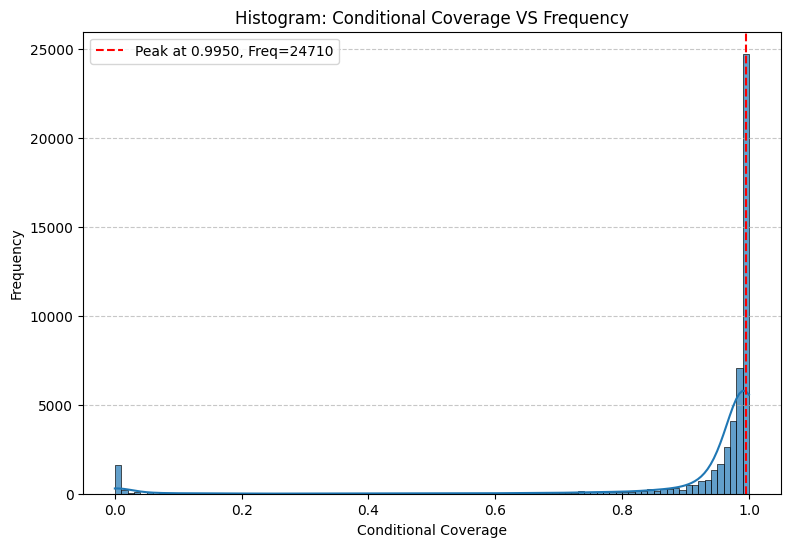

24710 (49.42%) samples reached the peak conditional coverage at 0.9950


In [6]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.1, k_reg=2, num_runs=10, alpha=0.05, is_ground_truth=False)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5983 ± 0.0053
Final Average Prediction Set Size: 1.63 ± 0.03
Final Average Coverage: 0.9490 ± 0.0039
Final Average Real Probability: 0.9233 ± 0.0038


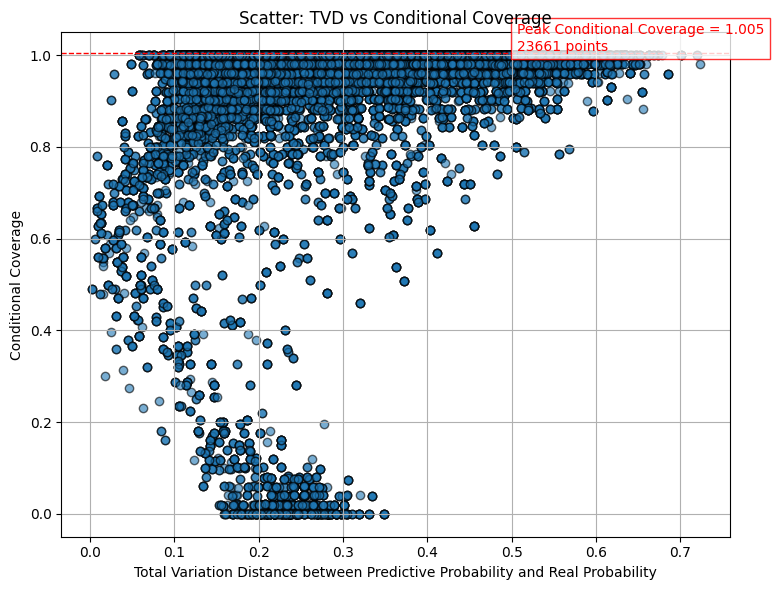

Peak Conditional Coverage = 1.005, with 23661 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.80478']
  Real Probability Set      : ['1.00000']
Sample 2:
  Predictive Probability Set: ['0.81309']
  Real Probability Set      : ['0.97959']
Sample 3:
  Predictive Probability Set: ['0.65692']
  Real Probability Set      : ['0.84615']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.33649', '0.16394']
  Real Probability Set      : ['0.04000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.19761', '0.15048', '0.14070']
  Real Probability Set      : ['0.00000', '0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.16418', '0.13329', '0.12942']
  Real Probability Set      : ['0.00000', '0.00000', '0.00000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.29233', '0.17165']
  Real Probability Set      : ['0.7

In [8]:
raps_cifar10h_scatter(model,dataset,device, lambda_=0.1, k_reg=2, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.4662 ± 0.1167
Final Average Prediction Set Size: 1.48 ± 0.06
Final Average Coverage: 0.9512 ± 0.0041
Final Average Real Probability: 0.9243 ± 0.0047


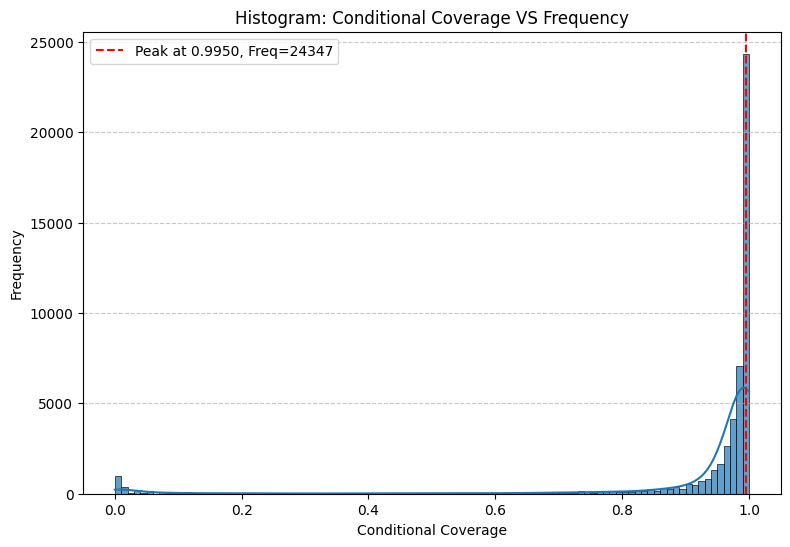

24347 (48.69%) samples reached the peak conditional coverage at 0.9950


In [5]:
saps_cifar10h_hist(model, dataset, device, lambda_=2.0, num_runs=10, alpha=0.05, is_ground_truth=False)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.4662 ± 0.1167
Final Average Prediction Set Size: 1.48 ± 0.06
Final Average Coverage: 0.9512 ± 0.0041
Final Average Real Probability: 0.9243 ± 0.0047


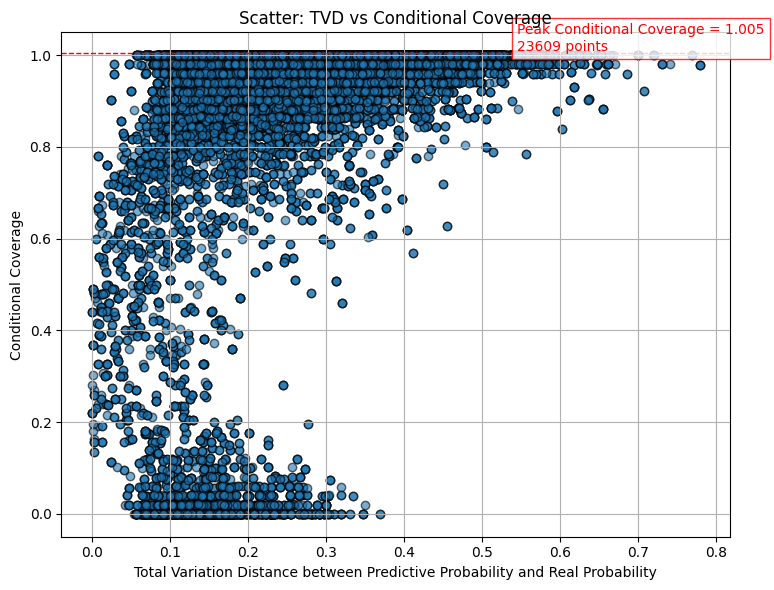

Peak Conditional Coverage = 1.005, with 23609 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.77157']
  Real Probability Set      : ['0.94828']
Sample 2:
  Predictive Probability Set: ['0.79060']
  Real Probability Set      : ['0.96154']
Sample 3:
  Predictive Probability Set: ['0.81357']
  Real Probability Set      : ['1.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.58698']
  Real Probability Set      : ['0.05769']
Sample 2:
  Predictive Probability Set: ['0.49433']
  Real Probability Set      : ['0.03922']
Sample 3:
  Predictive Probability Set: ['0.54297']
  Real Probability Set      : ['0.00000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.31176', '0.29065']
  Real Probability Set      : ['0.72000', '0.04000']
Sample 2:
  Predictive Probability Set: ['0.26876', '0.16888']
  Real Probability Set      :

In [9]:
saps_cifar10h_scatter(model, dataset, device, lambda_=2.0, num_runs=10, alpha=0.05)